# THE SPARKS FOUNDATION

# GRIP-TASK5 - Exploratory Data Analysis-Sports 

To Perform "Exploratory Data Analysis" on datset of "Indian Premier League"

As a sport analysts, finding out the most successfull teams, players and factors contributing for win or lose of a team

# Author : A. Sanjay

LIBRARY IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,interact_manual

DATA IMPORT

In [3]:
deliveries='C:\ExcelrPy\ipl\deliveries.csv'
matches='C:\ExcelrPy\ipl\matches.csv'

# Data Pre-Processing

In [4]:
matches_df=pd.read_csv(matches, encoding = "ISO-8859-1")
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
#checking for NaN values in dataset
matches_df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [7]:
matches_df[matches_df['city'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


On googling the location where the matches were held on above dates, we find that it is Dubai, so replacing the null values in the city column with Dubai

In [8]:
matches_df.loc[matches_df['city'].isna(),['city']]='Abu Dhabi'
matches_df['city'].isnull().sum()

0

In [9]:
matches_df['city']

0          Hyderabad
1               Pune
2             Rajkot
3             Indore
4          Bangalore
           ...      
751           Mumbai
752          Chennai
753    Visakhapatnam
754    Visakhapatnam
755        Hyderabad
Name: city, Length: 756, dtype: object

In [10]:
matches_df[matches_df['winner'].isna()],matches_df[matches_df['player_of_match'].isna()]

(        id  season       city        date                        team1  \
 300    301    2011      Delhi  21-05-2011             Delhi Daredevils   
 545    546    2015  Bangalore  29-04-2015  Royal Challengers Bangalore   
 570    571    2015  Bangalore  17-05-2015             Delhi Daredevils   
 744  11340    2019  Bengaluru  30-04-2019  Royal Challengers Bangalore   
 
                            team2                  toss_winner toss_decision  \
 300                Pune Warriors             Delhi Daredevils           bat   
 545             Rajasthan Royals             Rajasthan Royals         field   
 570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
 744             Rajasthan Royals             Rajasthan Royals         field   
 
         result  dl_applied winner  win_by_runs  win_by_wickets  \
 300  no result           0    NaN            0               0   
 545  no result           0    NaN            0               0   
 570  no result     

OBSERVATION: 
Here, when the value of winner is NaN, the corresponding row's player_of_match column is also NaN. Sice there cannot be a player_of_match if there is no winner, the null values are justified.

In [11]:
deliveries_df=pd.read_csv(deliveries, encoding = "ISO-8859-1")
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
deliveries_df.isna().sum(), deliveries_df.shape

(match_id                 0
 inning                   0
 batting_team             0
 bowling_team             0
 over                     0
 ball                     0
 batsman                  0
 non_striker              0
 bowler                   0
 is_super_over            0
 wide_runs                0
 bye_runs                 0
 legbye_runs              0
 noball_runs              0
 penalty_runs             0
 batsman_runs             0
 extra_runs               0
 total_runs               0
 player_dismissed    170244
 dismissal_kind      170244
 fielder             172630
 dtype: int64,
 (179078, 21))

The null values in player_dismissed, dismissal_kind and fielder are justified since a player need not be dissmissed in every match. They are dissmed only in situations of foul play or health issues or some other inevitable reason.

# Data Visualisation

#*Analysing the IPL teams*

In [12]:
plt.style.use('dark_background')

## Team with most Wins

In [13]:
matches_df.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

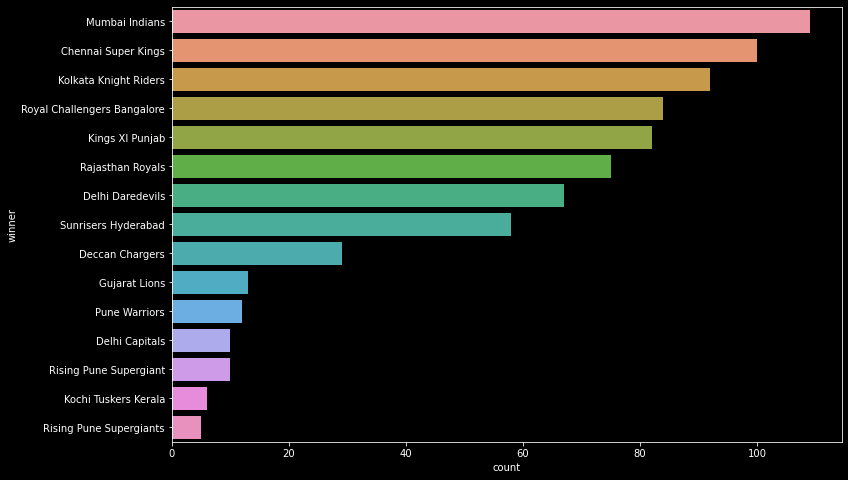

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(y=matches_df['winner'],order = matches_df['winner'].value_counts().index)
plt.show()

OBSERVATION -> <br>
Mumbai Indians are at the top position by winning the most number of matches followed by Chennai super kings, Kolkata Knight Riders and so on.

## Toss impact on teams

In [15]:
matches_df.toss_winner.value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

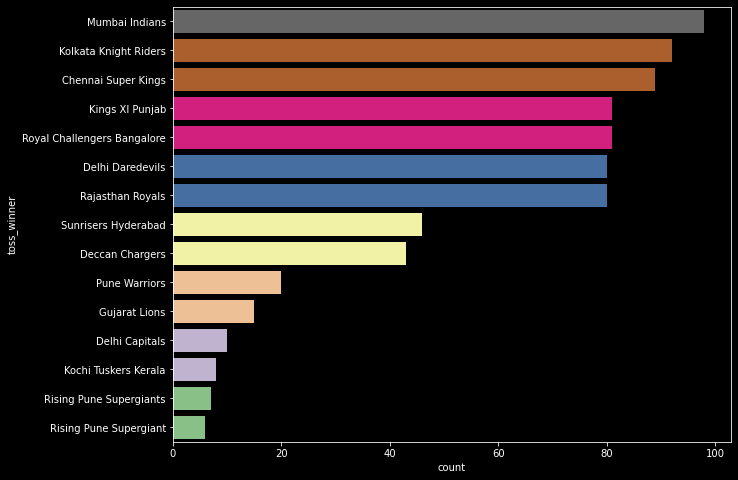

In [16]:

plt.figure(figsize=(10,8))
sns.countplot(y=matches_df['toss_winner'],order=matches_df['toss_winner'].value_counts().index,palette='Accent_r')
plt.show()


OBSERVATION -> <br>
The teams that won the toss the most also seems to be almost the same  as the teams that have won the most matches. So we can say that the winning the toss does have a positive effect in determining the team's victory.

## Number of matches won every year by top 4 teams

In [17]:
winning_trend=pd.crosstab(matches_df.season,matches_df.winner)
winning_trend=winning_trend[['Mumbai Indians','Chennai Super Kings','Kolkata Knight Riders','Royal Challengers Bangalore']]

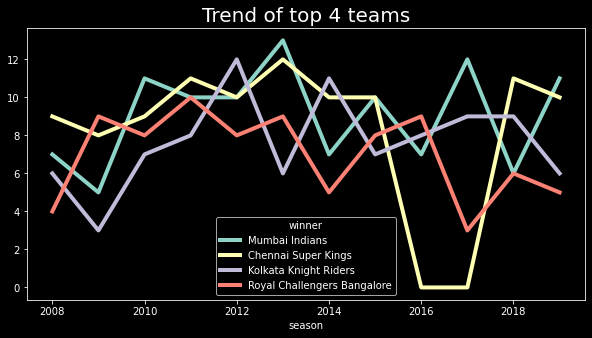

In [18]:
winning_trend.plot(linewidth=4,figsize=(10,5))
plt.title('Trend of top 4 teams',fontsize=20)
plt.show()
# No. of matches won is 0 for csk in the year 2016 and 2017 since during a ban was inpose on csk during that period

# When a team wins while chose to bat first

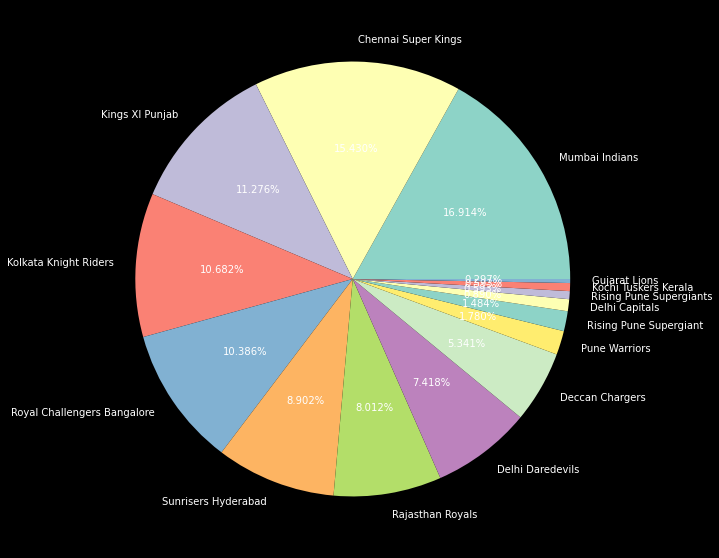

In [19]:
batting_first = matches_df[matches_df['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.3f%%')
plt.show()

# When a team wins while chose to  bat second

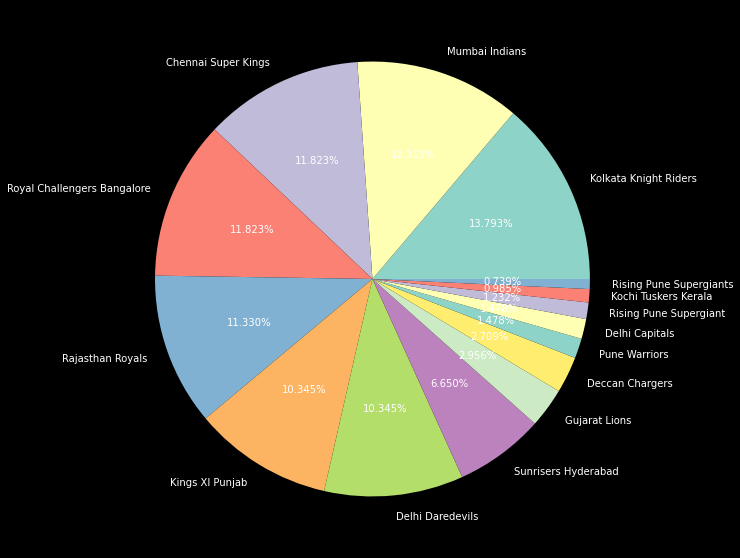

In [20]:
batting_second = matches_df[matches_df['win_by_wickets']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys())
        ,autopct='%0.3f%%')
plt.show()

OBSERVATION-><br>
We can see that KKR was more successful upon chasing the target whereas MI won many games by defending the target. CSK seems to be winning by both chasing and defending the target consistently.

## Teams that won the IPL trophy from 2008 to 2019

In [21]:

seasons=sorted(matches_df['season'].unique())

title_winner={}
for i in seasons:
  title_winner[i]=matches_df[matches_df.season==i]['winner'].value_counts().index[0]

title_winner=pd.DataFrame.from_dict([title_winner]).T
title_winner.rename(columns={0:'winner'},inplace=True)
title_winner.index.name='year'
title_winner

,winner
year,
2008,Rajasthan Royals
2009,Delhi Daredevils
2010,Mumbai Indians
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kings XI Punjab
2015,Mumbai Indians
2016,Sunrisers Hyderabad


## Teams that won with maximum wickets

In [22]:
matches_df.win_by_wickets.max()

10

In [23]:
matches_df.loc[matches_df.win_by_wickets==10][['season','team1','team2','winner']]

,season,team1,team2,winner
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


## Teams that won with maximum runs

In [24]:
matches_df.win_by_runs.max()

146

In [25]:
matches_df.loc[matches_df.win_by_runs==146][['season','team1','team2','winner']]

,season,team1,team2,winner
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians


# *Analysing IPL players*

Bar graph of player_of_match(top 20)

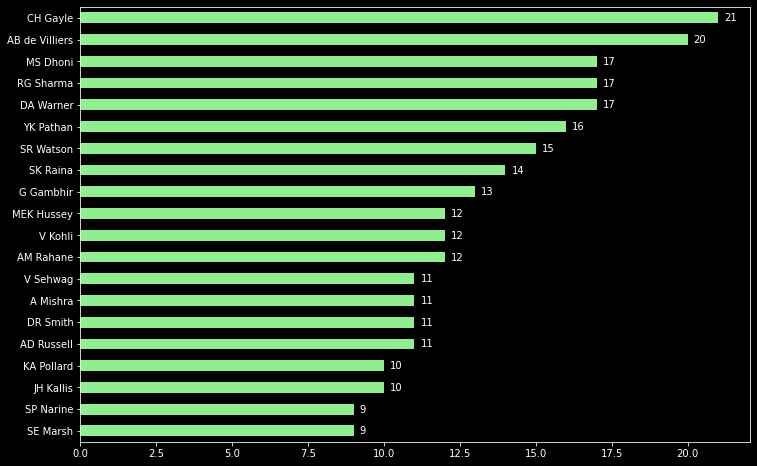

In [26]:
pom=matches_df['player_of_match'].value_counts().head(20).plot(kind='barh',figsize=(12,8),color='lightgreen')
pom.invert_yaxis()
for i in pom.patches:
  pom.text(i.get_width()+0.2,i.get_y()+.40,i.get_width())

plt.show()

OBSERVATION:
Chris Gayle has won the most 'Player of the match' titles in the past 14 seasons

## Batsmen that played the most deliveries(top 10)

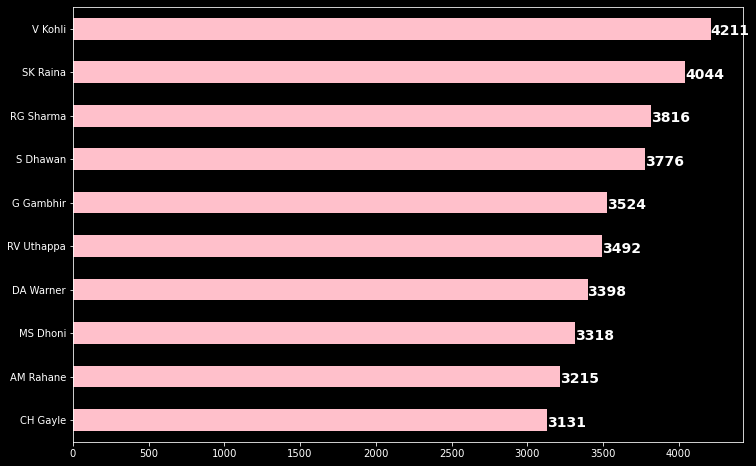

In [27]:
batsmen=deliveries_df['batsman'].value_counts().head(10).plot(kind='barh',figsize=(12,8),color='pink')
batsmen.invert_yaxis()

for i in batsmen.patches:
   batsmen.text(i.get_width()+.05, i.get_y()+.40,
                                  i.get_width(),fontsize=14,
                                  fontweight = 'bold', color='white')
plt.show()

## Bowlers with most deliveries(top 10)

In [28]:
deliveries_df.loc[40:100,:]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
40,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,3,MC Henriques,S Dhawan,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
41,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,4,S Dhawan,MC Henriques,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
42,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,5,MC Henriques,S Dhawan,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
43,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,6,S Dhawan,MC Henriques,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
44,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,1,S Dhawan,MC Henriques,TM Head,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
99,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,1,DJ Hooda,Yuvraj Singh,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


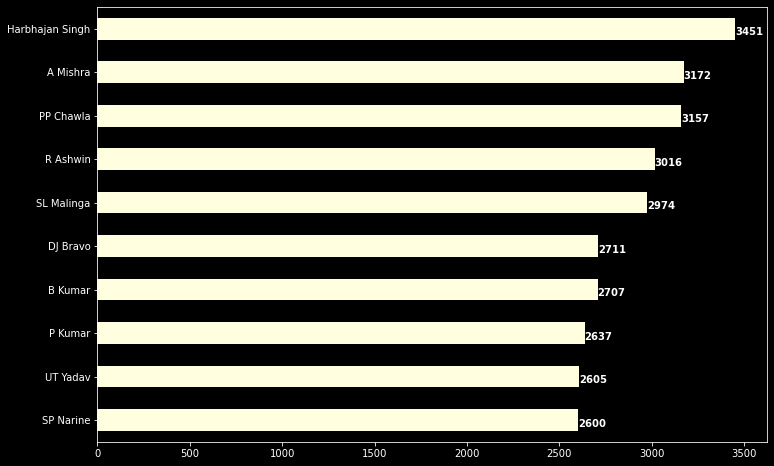

In [29]:
bowler=deliveries_df['bowler'].value_counts().head(10).plot(kind='barh',figsize=(12,8),color='lightyellow')
bowler.invert_yaxis()

for i in bowler.patches:
   bowler.text(i.get_width(), i.get_y()+0.4,
                                  i.get_width(),
                                  fontweight = 'bold', color='white')
plt.show()

## Batsmen with the most no. of runs(top 10)

In [30]:
most_runs=deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:10]
most_runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

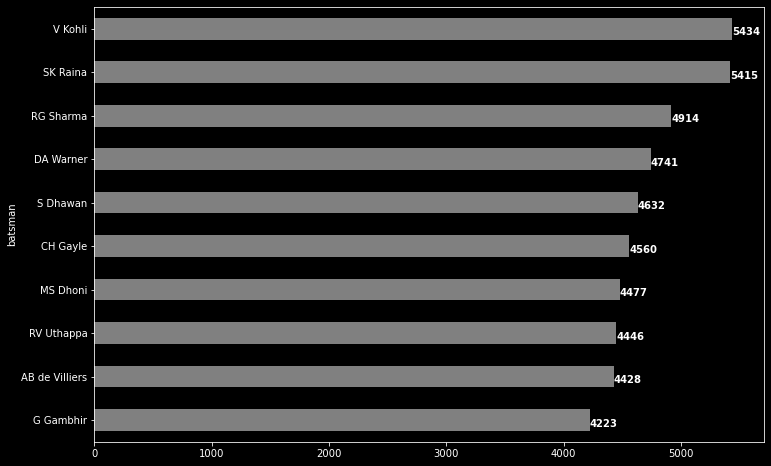

In [31]:
batsmen=most_runs.plot(kind='barh',figsize=(12,8),color='grey')
batsmen.invert_yaxis()

for i in batsmen.patches:
   batsmen.text(i.get_width(), i.get_y()+0.4,
                                  i.get_width(),
                                  fontweight = 'bold', color='white')
plt.show()

## Trend Plot analysing performance of top 3 players

Merging matches and deliveries dataset

In [32]:
df = pd.merge(matches_df,deliveries_df, left_on = 'id', right_on = 'match_id')
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'match_id', 'inning',
       'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

In [33]:
kohli=df[df['batsman']=='V Kohli'].groupby('season')['batsman_runs'].sum()
raina=df[df['batsman']=='SK Raina'].groupby('season')['batsman_runs'].sum()
sharma=df[df['batsman']=='RG Sharma'].groupby('season')['batsman_runs'].sum()

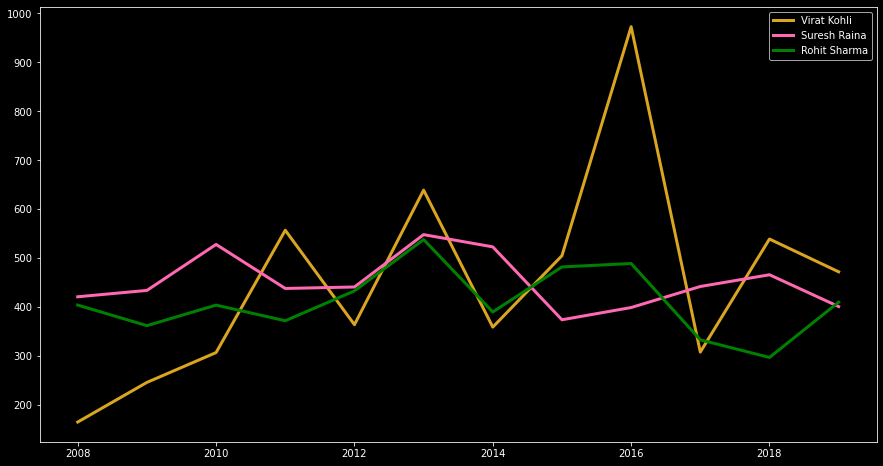

In [34]:
plt.figure(figsize=(15,8))
plt.plot(kohli, linewidth = 3,color = 'goldenrod', label = 'Virat Kohli')
plt.plot(raina, linewidth = 3,color = 'hotpink', label = 'Suresh Raina')
plt.plot(sharma, linewidth = 3,color = 'green', label = 'Rohit Sharma')
plt.legend()

Raina's and Rohit's performances are consistent. Virats's performance either gets too high or too low. 

# Top 10 Venues that hosted the most matches

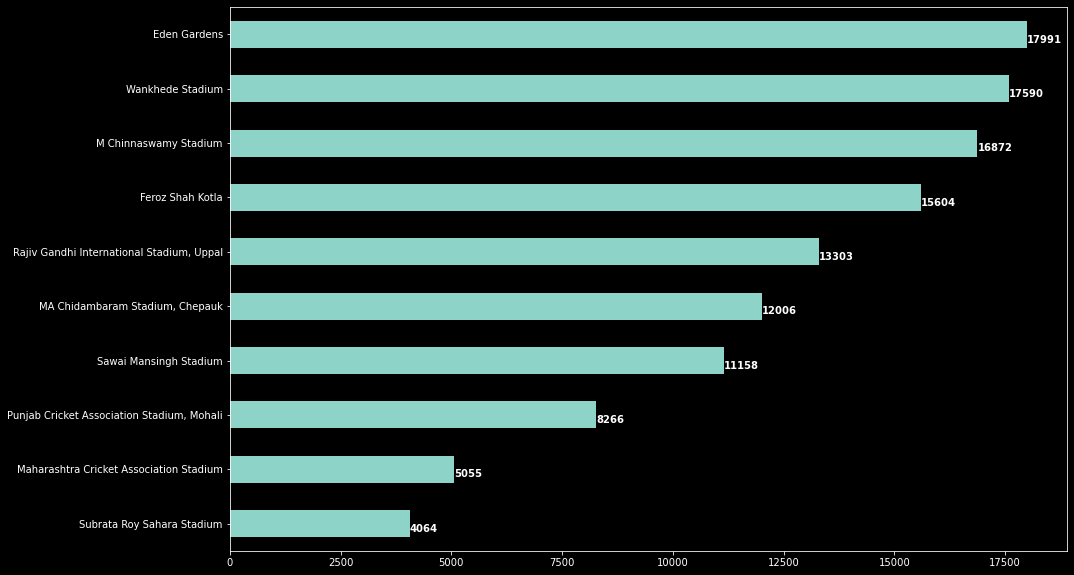

In [35]:
plt.figure(figsize=(15,10))
venue=df.venue.value_counts().head(10).plot(kind='barh')
venue.invert_yaxis()

for i in venue.patches:
  venue.text(i.get_width(), i.get_y()+0.4,i.get_width(), fontweight = 'bold', color='white')
plt.show()

# Team wins in home city vs other cities


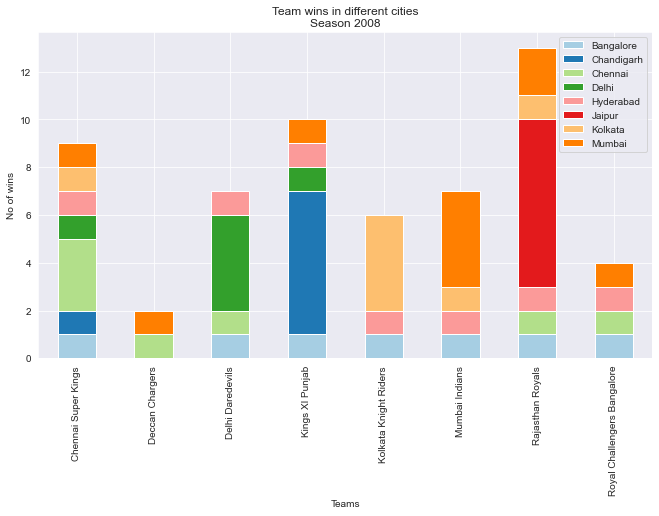

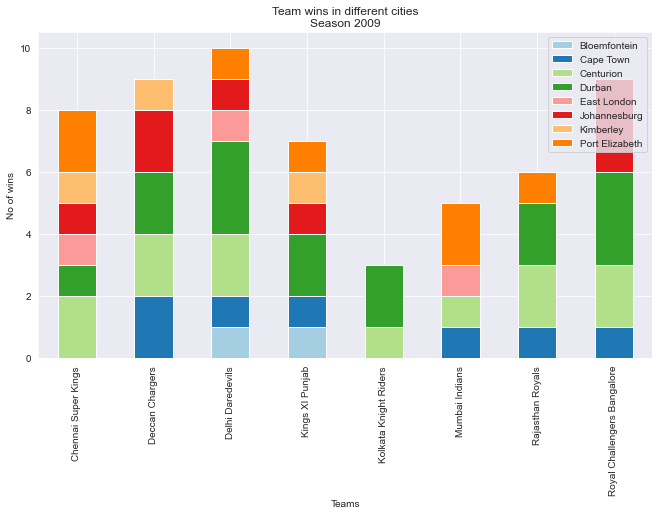

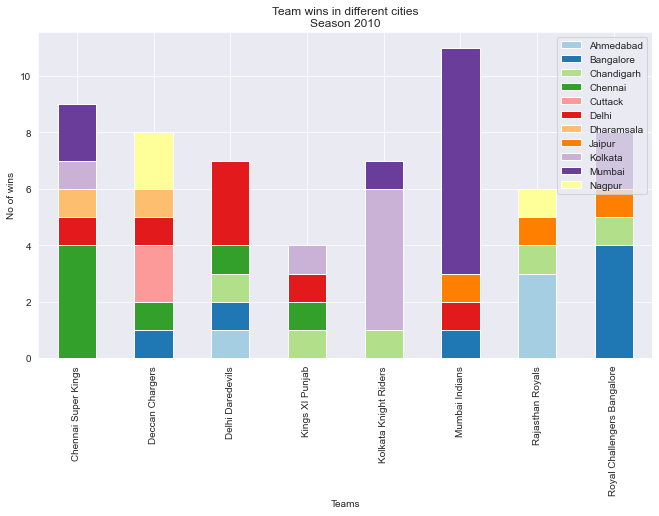

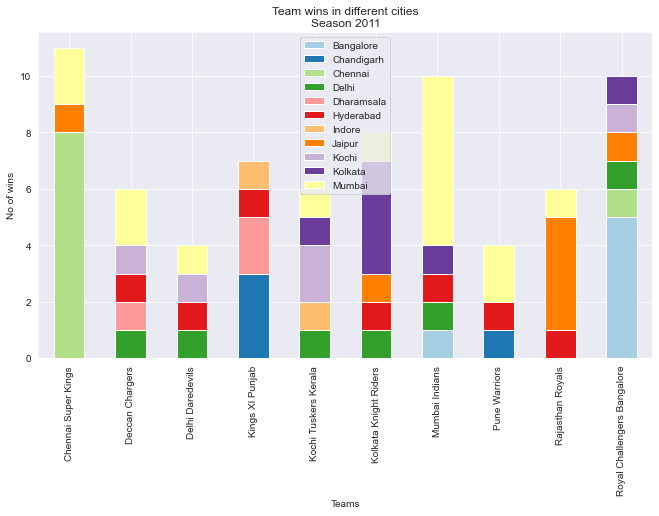

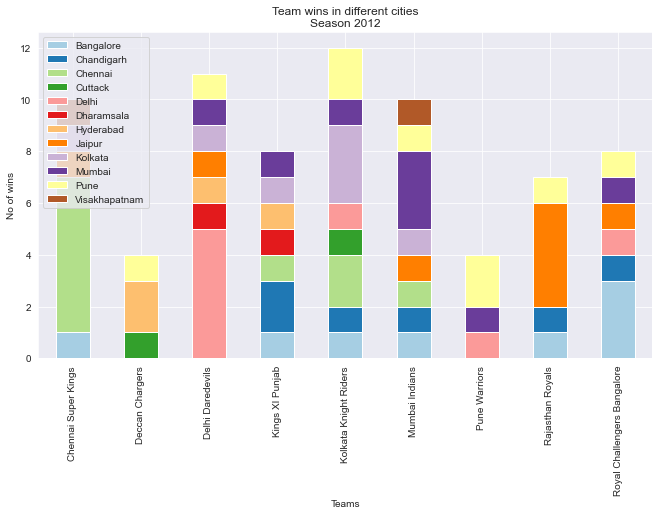

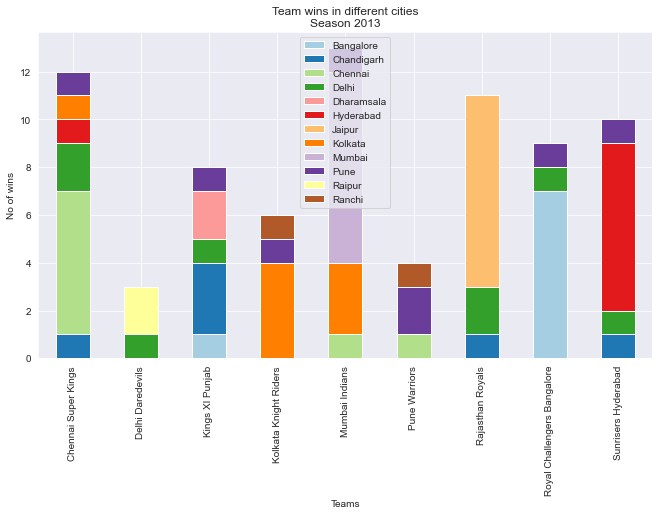

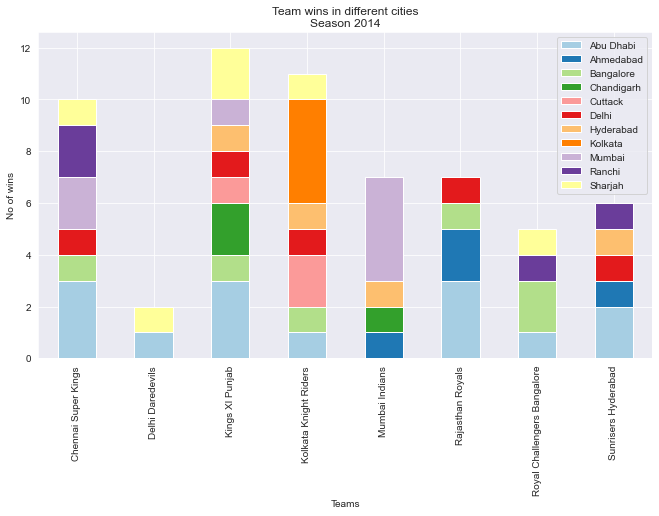

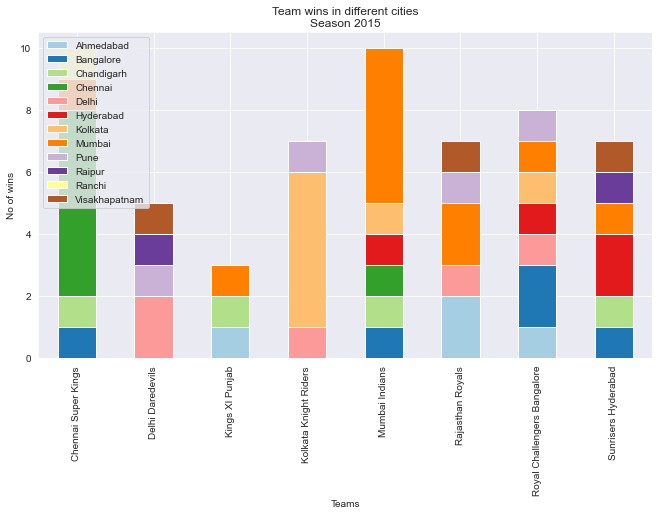

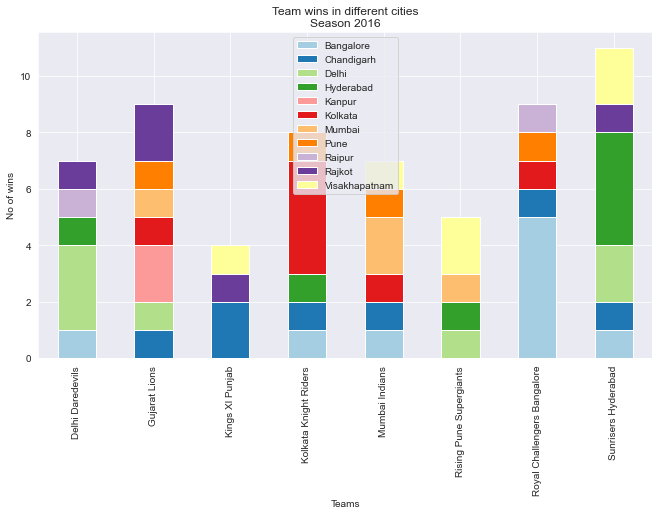

In [14]:
sns.set_style("darkgrid")
x, y = 2008, 2017
while x < y:
    wins_percity = matches_df[matches_df['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(11, 6))
    sns.set_palette("Paired", len(matches_df['city'].unique()))
    plot.set_xlabel("Teams",)
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':10})
    x+=1

# Conclusion:

# 1. Most Successful Teams - Mumbai Indians and Chennai Super Kings

# 2. Best Players  - Chris Gayle and Ab de Villiers

# 3. The teams that won the toss the most also seems to be almost the same as the teams that have won the most matches. So we can say that the winning the toss does have a positive effect in determining the team's victory. 